In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import category_encoders as ce
from datetime import datetime

'''!pip install -U scikit-learn --upgrade
import scikit-learn '''


%matplotlib inline

In [ ]:
ush=pd.read_csv("/content/drive/MyDrive/USA_Housing.csv")
ush.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
ush.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
ush.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
ush.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [ ]:
print(ush['Address'].head(20))

0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1     188 Johnson Views Suite 079\nLake Kathleen, CA...
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                             USS Barnett\nFPO AP 44820
4                            USNS Raymond\nFPO AE 09386
5     06039 Jennifer Islands Apt. 443\nTracyport, KS...
6     4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...
7        972 Joyce Viaduct\nLake William, TN 17778-6483
8                             USS Gilbert\nFPO AA 20957
9                      Unit 9446 Box 0958\nDPO AE 97025
10    6368 John Motorway Suite 700\nJanetbury, NM 26854
11    911 Castillo Park Apt. 717\nDavisborough, PW 7...
12    209 Natasha Stream Suite 961\nHuffmanland, NE ...
13    829 Welch Track Apt. 992\nNorth John, AR 26532...
14                     PSC 5330, Box 4420\nAPO AP 08302
15       2278 Shannon View\nNorth Carriemouth, NM 84617
16     064 Hayley Unions\nNicholsborough, HI 44161-1887
17        5498 Rachel Locks\nNew Gregoryshire, P

In [ ]:
ush['area1']=ush['Address'].str.split(",",n=1,expand=True)[1]
#ush['area1']=area
#print(area.head(30))
#print(ush['area1'].head(50))
ush['area2'] = ush['area1'].str[:3]
#ush['area2']=ush['area1'].str.split(" ",n=1, expand=True)[1]
print(ush['area2'].head(30))

0       NE
1       CA
2       WI
3     None
4     None
5       KS
6       CO
7       TN
8     None
9     None
10      NM
11      PW
12      NE
13      AR
14      Bo
15      NM
16      HI
17      PW
18    None
19      ME
20      HI
21    None
22      TN
23      IN
24      MI
25      DE
26      AZ
27      MA
28      MN
29      AL
Name: area2, dtype: object


In [ ]:
print(ush['area2'].nunique())
print(ush['area2'].count())
print(ush['area2'].unique())

60
4653
[' NE' ' CA' ' WI' None ' KS' ' CO' ' TN' ' NM' ' PW' ' AR' ' Bo' ' HI'
 ' ME' ' IN' ' MI' ' DE' ' AZ' ' MA' ' MN' ' AL' ' NY' ' NV' ' VA' ' ID'
 ' OK' ' NH' ' MO' ' WV' ' WY' ' MH' ' UT' ' SD' ' CT' ' AK' ' WA' ' RI'
 ' NJ' ' KY' ' NC' ' IA' ' VT' ' FM' ' ND' ' LA' ' MP' ' OR' ' TX' ' DC'
 ' PR' ' MT' ' AS' ' OH' ' MS' ' IL' ' VI' ' GA' ' PA' ' MD' ' SC' ' GU'
 ' FL']


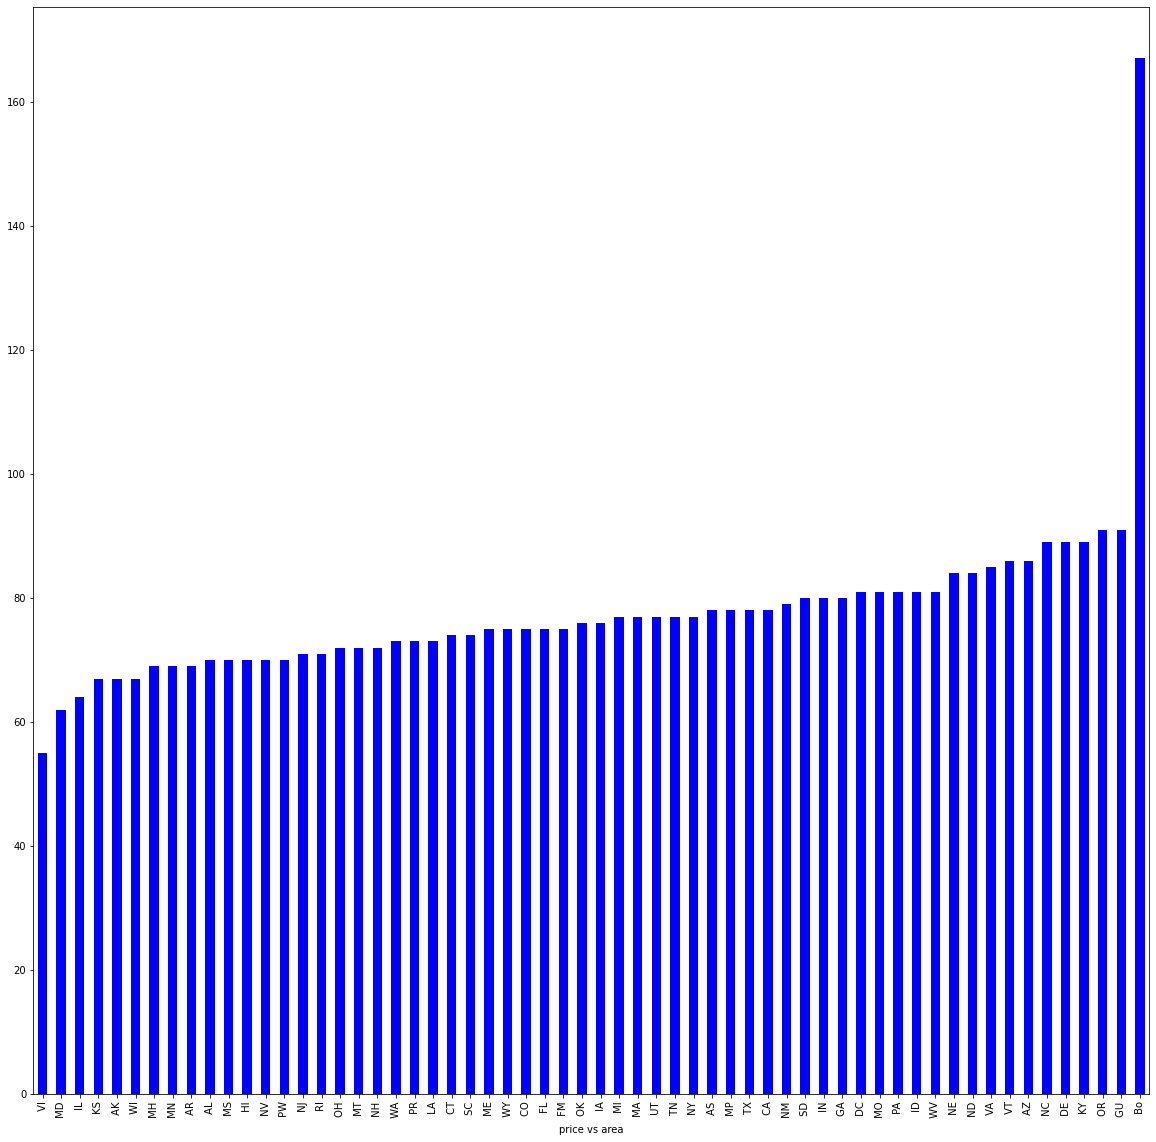

In [ ]:
#Price vs area bar chart
fig = plt.figure(figsize=(20,20))
gender_resigned = ush.groupby('area2')['Price'].count().sort_values(ascending=True)
gender_resigned.plot(kind='bar',color='blue')
#plt.grid(b=True,which='both',color='blue')
plt.xlabel('price vs area')
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8768869bd0>,
      dtype=object)

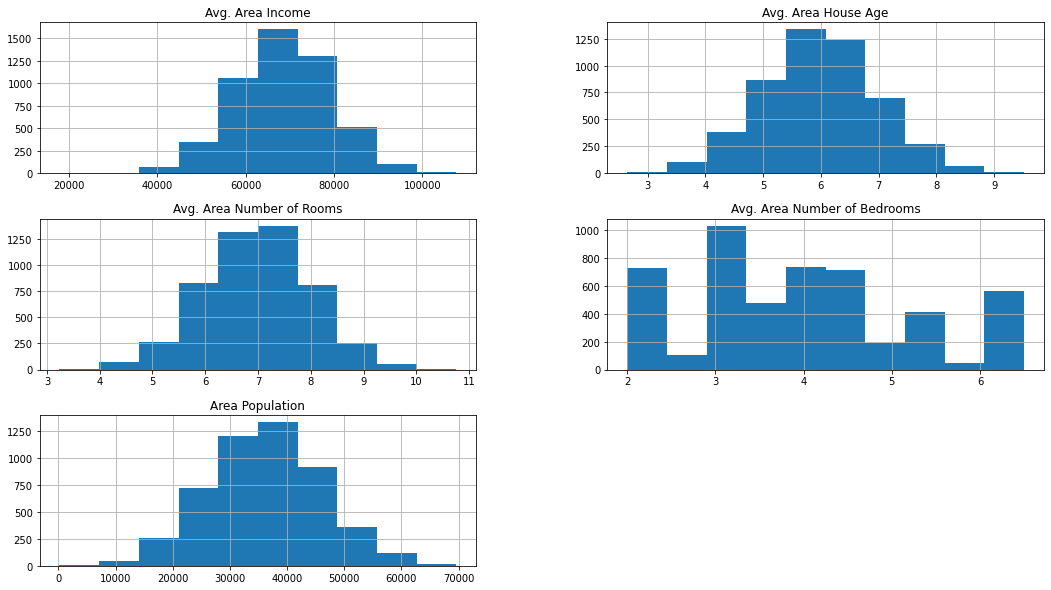

In [ ]:
# Plotting histograms of multiple columns together
ush.hist(['Avg. Area Income' ,'Avg. Area House Age' , 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'], figsize=(18,10))

In [ ]:
ush.isnull().sum()

Avg. Area Income                  0
Avg. Area House Age               0
Avg. Area Number of Rooms         0
Avg. Area Number of Bedrooms      0
Area Population                   0
Price                             0
Address                           0
area1                           347
area2                           347
dtype: int64

In [ ]:
del ush['area1']

In [ ]:
ush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
 7   area2                         4653 non-null   object 
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


In [ ]:
#ushnew=ush[['Avg. Area Income',' Avg. Area House Age ','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',' Area Population ',' area2 ',' Price',]]
del ush['Address']

In [ ]:
ush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   area2                         4653 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
print(ush['area2'])
#print(pd.get_dummies('area2'))

0         NE
1         CA
2         WI
3       None
4       None
        ... 
4995    None
4996      Bo
4997      VA
4998    None
4999      NV
Name: area2, Length: 5000, dtype: object


In [ ]:
ush['areafill']=ush['area2']
print(ush['areafill'])
dfimputed = ush.apply(lambda x: x.fillna(x.value_counts().index[7]))
print(dfimputed)



0         NE
1         CA
2         WI
3       None
4       None
        ... 
4995    None
4996      Bo
4997      VA
4998    None
4999      NV
Name: areafill, Length: 5000, dtype: object
      Avg. Area Income  Avg. Area House Age  ...  area2  areafill
0         79545.458574             5.682861  ...     NE        NE
1         79248.642455             6.002900  ...     CA        CA
2         61287.067179             5.865890  ...     WI        WI
3         63345.240046             7.188236  ...     AZ        AZ
4         59982.197226             5.040555  ...     AZ        AZ
...                ...                  ...  ...    ...       ...
4995      60567.944140             7.830362  ...     AZ        AZ
4996      78491.275435             6.999135  ...     Bo        Bo
4997      63390.686886             7.250591  ...     VA        VA
4998      68001.331235             5.534388  ...     AZ        AZ
4999      65510.581804             5.992305  ...     NV        NV

[5000 rows x 8 colum

In [ ]:
print(dfimputed.isnull().sum())


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
area2                           0
areafill                        0
dtype: int64


In [ ]:


dfimputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   area2                         5000 non-null   object 
 7   areafill                      5000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


In [ ]:
#del dfimputed['area2']
dfimputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   area2                         5000 non-null   object 
 7   areafill                      5000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


In [ ]:
dfimputed.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
area2                             60
areafill                          60
dtype: int64

In [ ]:
#Create object for hash encoder
encoder=ce.BinaryEncoder(cols='areafill',return_df=True)
#Fit and Transform Data
newdf=encoder.fit_transform(dfimputed)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [ ]:
newdf

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,area2,areafill_0,areafill_1,areafill_2,areafill_3,areafill_4,areafill_5,areafill_6
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE,0,0,0,0,0,0,1
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA,0,0,0,0,0,1,0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI,0,0,0,0,0,1,1
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,AZ,0,0,0,0,1,0,0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AZ,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,AZ,0,0,0,0,1,0,0
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,Bo,0,0,0,1,0,1,1
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,VA,0,0,1,0,1,1,0
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,AZ,0,0,0,0,1,0,0


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   area2                         5000 non-null   object 
 7   areafill_0                    5000 non-null   int64  
 8   areafill_1                    5000 non-null   int64  
 9   areafill_2                    5000 non-null   int64  
 10  areafill_3                    5000 non-null   int64  
 11  areafill_4                    5000 non-null   int64  
 12  areafill_5                    5000 non-null   int64  
 13  are

In [ ]:
'''def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])'''

"def PlotBarCharts(inpData, colsToPlot):\n    %matplotlib inline\n    \n    import matplotlib.pyplot as plt\n    \n    # Generating multiple subplots\n    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))\n    fig.suptitle('Bar charts of: '+ str(colsToPlot))\n\n    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):\n        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])"

In [ ]:
#PlotBarCharts(inpData=ush, colsToPlot=['areafill_0','areafill_1'])

In [ ]:
X=newdf[['Avg. Area Income'	,'Avg. Area House Age',	'Avg. Area Number of Rooms'	,'Avg. Area Number of Bedrooms','Area Population','areafill_0','areafill_1','areafill_2','areafill_3','areafill_4','areafill_5'	,'areafill_6']]
Y=newdf['Price']



In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3500, 12)
(3500,)
(1500, 12)
(1500,)


In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
#!pip uninstall scikit-learn
#!pip install sklearn.feature_selection 
#!pip install SelectkBest'''

In [ ]:
#n!pip uninstall sklearn

In [ ]:
#!pip3 install scikit-learn

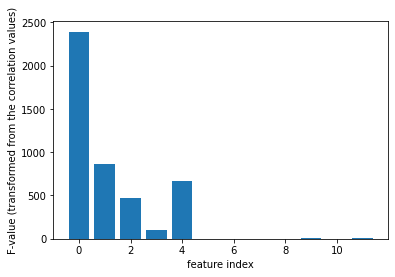

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# feature selection

f_selector = SelectKBest(score_func=f_regression, k='all')

# learn relationship from training data

f_selector.fit(X_train,Y_train)

# transform train input data

X_train_fs = f_selector.transform(X_train)

 # transform test input data

X_test_fs = f_selector.transform(X_test)

 # Plot the scores for the features

plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")

plt.ylabel("F-value (transformed from the correlation values)")
plt.show()